In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Load Data
# -------------------------------
df = pd.read_csv("/content/Project 1 - Weather Dataset.csv")

In [ ]:
# Map weather into 5 categories
def map_weather(cond):
    cond = cond.lower()
    if "clear" in cond: return "Clear"
    if "cloud" in cond or "overcast" in cond: return "Cloudy"
    if any(x in cond for x in ["rain","drizzle","shower","thunderstorm"]): return "Rain"
    if "snow" in cond: return "Snow"
    return "Fog/Haze"

df["Weather_Category"] = df["Weather"].apply(map_weather)

In [ ]:
# Features & Target
# -------------------------------
num_cols = ['Temp_C','Dew Point Temp_C','Rel Hum_%',
            'Wind Speed_km/h','Visibility_km','Press_kPa']
X = df[num_cols]
y = df["Weather_Category"]

In [ ]:
# Function to Cap Outliers
# -------------------------------
def cap_outliers(series):
    Q1, Q3 = series.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    return series.clip(lower, upper)



--- BEFORE Outlier Capping ---
Temp_C: Skew = -0.18, Kurt = -0.92


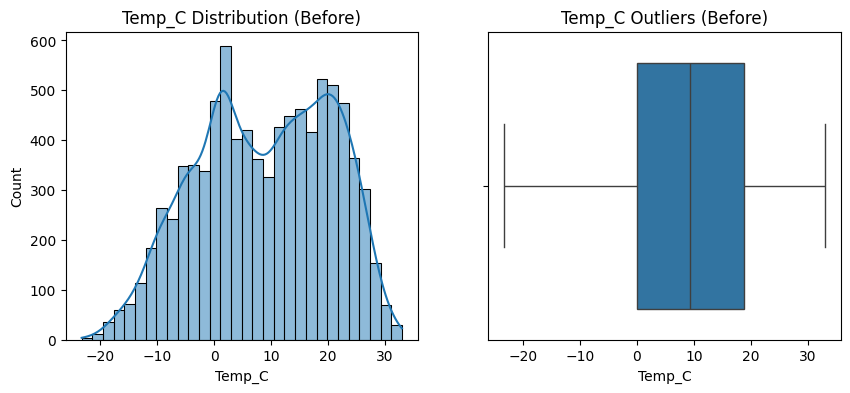

Dew Point Temp_C: Skew = -0.32, Kurt = -0.82


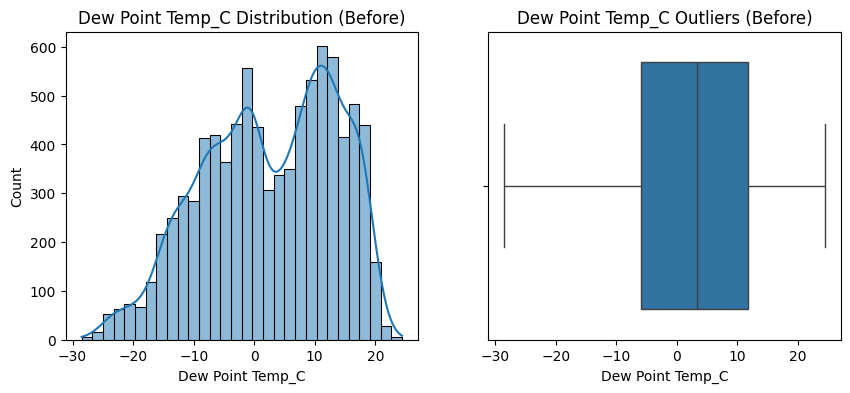

Rel Hum_%: Skew = -0.32, Kurt = -0.55


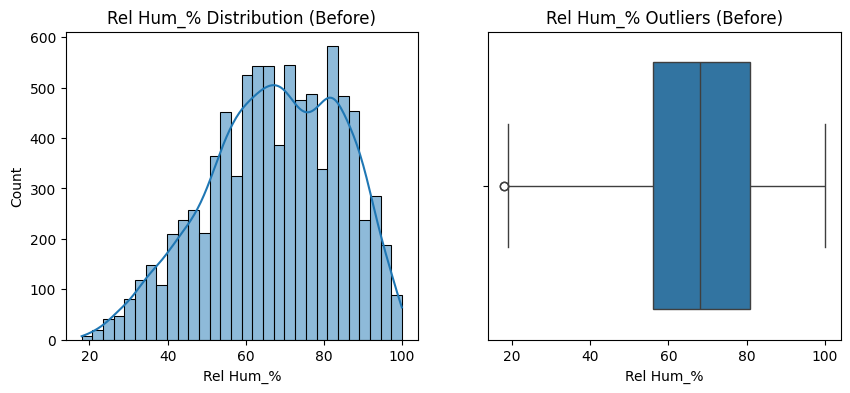

Wind Speed_km/h: Skew = 0.87, Kurt = 1.54


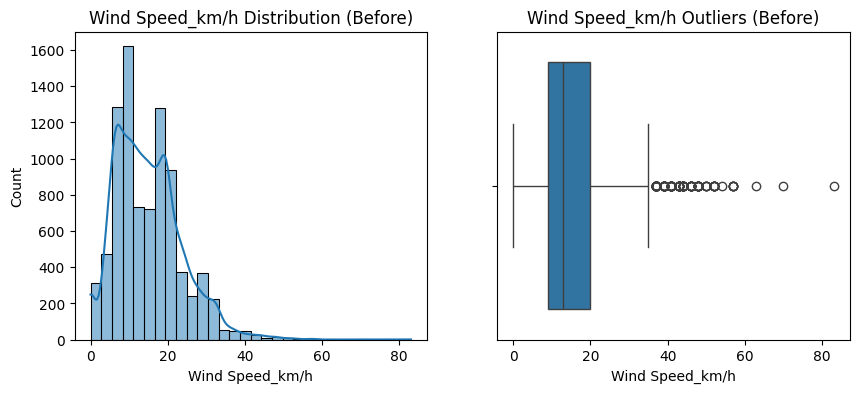

Visibility_km: Skew = 0.41, Kurt = -0.35


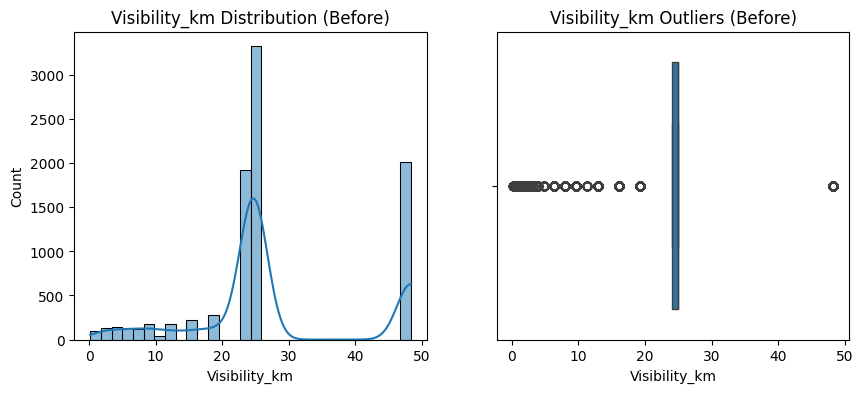

Press_kPa: Skew = -0.23, Kurt = 0.71


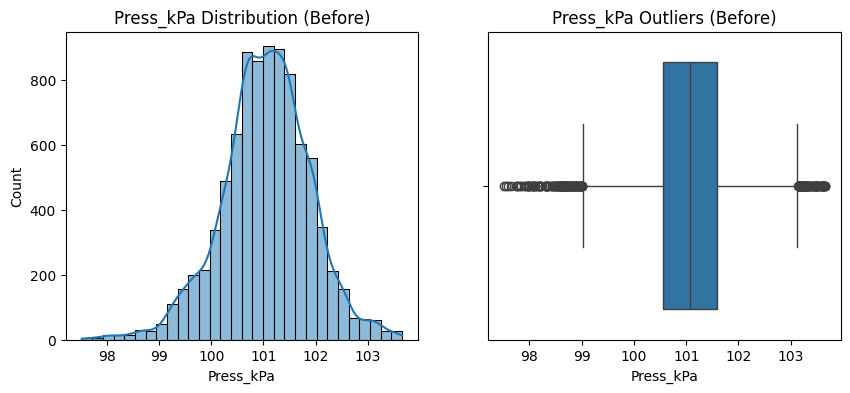

In [ ]:
# Before Outlier Handling Plots
# -------------------------------
print("\n--- BEFORE Outlier Capping ---")
for col in num_cols:
    print(f"{col}: Skew = {skew(df[col]):.2f}, Kurt = {kurtosis(df[col]):.2f}")
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1); sns.histplot(df[col], kde=True, bins=30); plt.title(f"{col} Distribution (Before)")
    plt.subplot(1,2,2); sns.boxplot(x=df[col]); plt.title(f"{col} Outliers (Before)")
    plt.show()


In [ ]:
# Apply Outlier Capping
# -------------------------------
for col in num_cols:
    df[col] = cap_outliers(df[col])

print("\n--- AFTER Outlier Capping ---")
print(df[num_cols].describe())\


--- AFTER Outlier Capping ---
            Temp_C  Dew Point Temp_C    Rel Hum_%  Wind Speed_km/h  \
count  8784.000000       8784.000000  8784.000000      8784.000000   
mean      8.798144          2.555294    67.431808        14.830032   
std      11.687883         10.883072    16.918550         8.304854   
min     -23.300000        -28.500000    18.500000         0.000000   
25%       0.100000         -5.900000    56.000000         9.000000   
50%       9.300000          3.300000    68.000000        13.000000   
75%      18.800000         11.800000    81.000000        20.000000   
max      33.000000         24.400000   100.000000        36.500000   

       Visibility_km    Press_kPa  
count    8784.000000  8784.000000  
mean       24.722080   101.056562  
std         1.181876     0.818118  
min        22.750000    99.015000  
25%        24.100000   100.560000  
50%        25.000000   101.070000  
75%        25.000000   101.590000  
max        26.350000   103.135000  



--- After Outlier Capping ---
Temp_C: Skew = -0.18, Kurt = -0.92


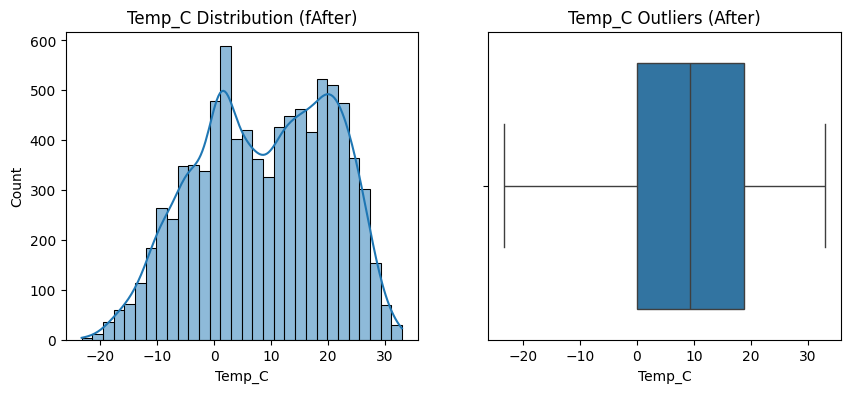

Dew Point Temp_C: Skew = -0.32, Kurt = -0.82


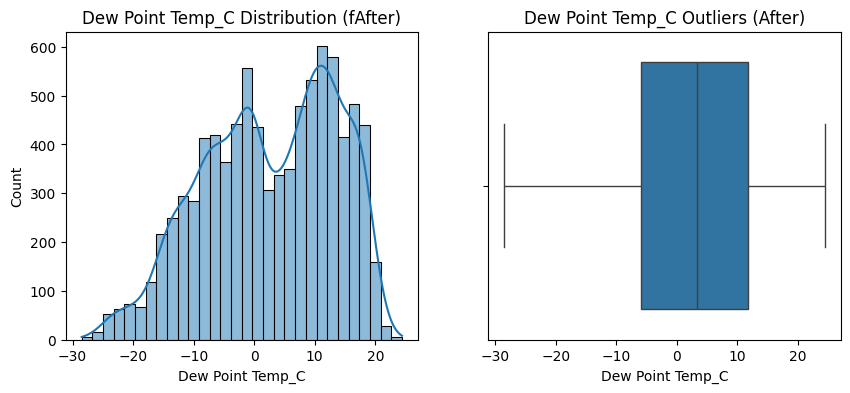

Rel Hum_%: Skew = -0.32, Kurt = -0.55


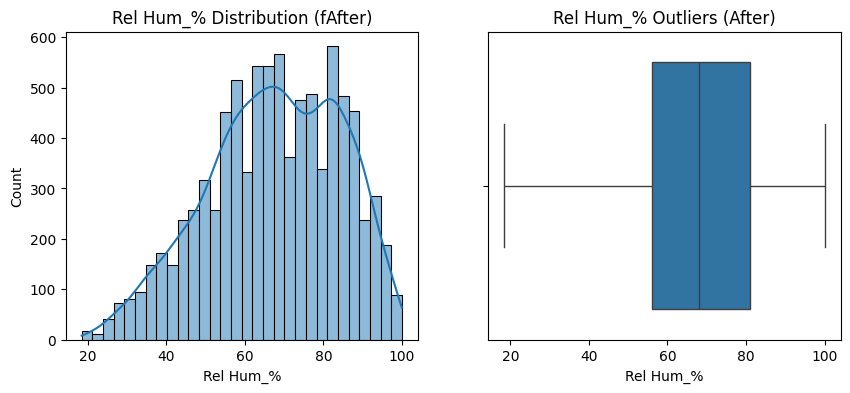

Wind Speed_km/h: Skew = 0.53, Kurt = -0.19


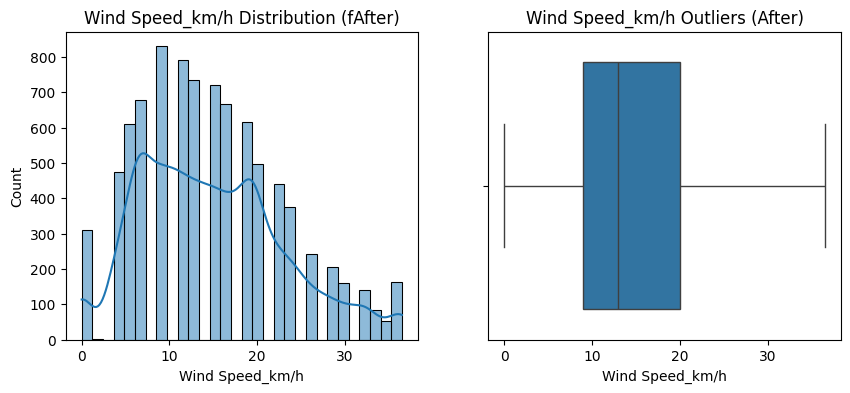

Visibility_km: Skew = -0.23, Kurt = -0.81


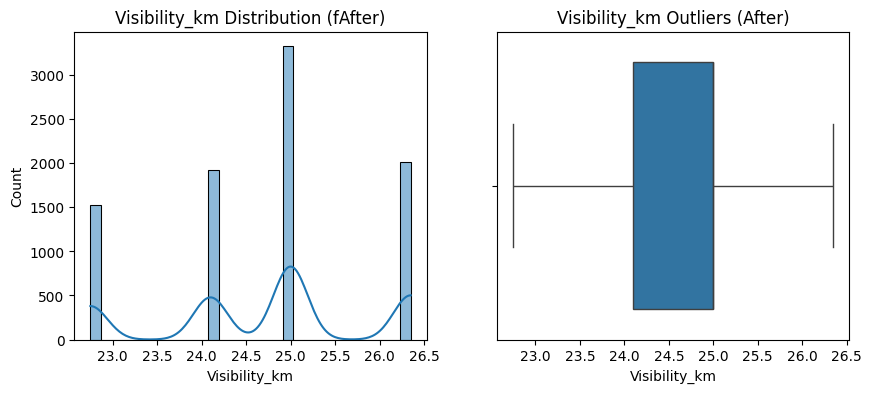

Press_kPa: Skew = -0.10, Kurt = 0.06


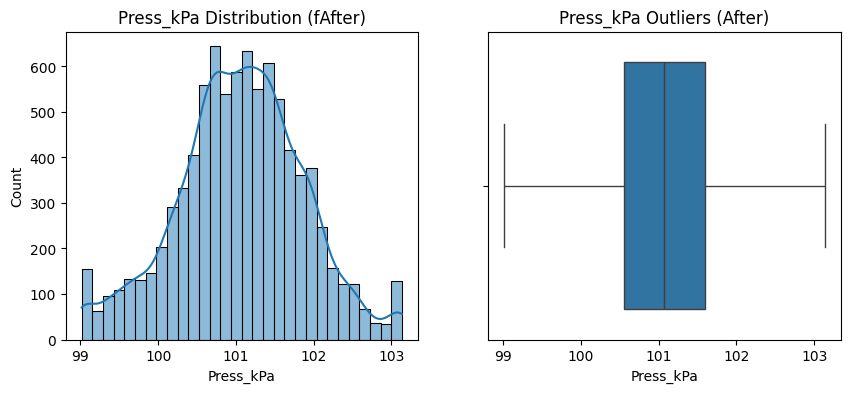

In [ ]:
# \After Outlier Handling Plots
# -------------------------------
print("\n--- After Outlier Capping ---")
for col in num_cols:
    print(f"{col}: Skew = {skew(df[col]):.2f}, Kurt = {kurtosis(df[col]):.2f}")
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1); sns.histplot(df[col], kde=True, bins=30); plt.title(f"{col} Distribution (fAfter)")
    plt.subplot(1,2,2); sns.boxplot(x=df[col]); plt.title(f"{col} Outliers (After)")
    plt.show()


In [ ]:
# Train-Test Split (after cleaning)
# -------------------------------
X = df[num_cols]
y = df["Weather_Category"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Random Forest Accuracy: 0.7188389299943084

Classification Report:
               precision    recall  f1-score   support

       Clear       0.73      0.76      0.75       665
      Cloudy       0.71      0.74      0.73       772
    Fog/Haze       0.68      0.62      0.65        37
        Rain       0.70      0.53      0.60       178
        Snow       0.76      0.65      0.70       105

    accuracy                           0.72      1757
   macro avg       0.72      0.66      0.68      1757
weighted avg       0.72      0.72      0.72      1757


Confusion Matrix:
 [[507 150   6   2   0]
 [175 571   1  19   6]
 [  0   3  23  11   0]
 [  9  57   3  94  15]
 [  5  22   1   9  68]]


In [ ]:
# Decision Tree
# -------------------------------
dt = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
print("\nDecision Tree Report:\n", classification_report(y_test, dt.predict(X_test)))


Decision Tree Report:
               precision    recall  f1-score   support

       Clear       0.66      0.67      0.67       665
      Cloudy       0.63      0.65      0.64       772
    Fog/Haze       0.54      0.51      0.53        37
        Rain       0.50      0.44      0.47       178
        Snow       0.71      0.62      0.66       105

    accuracy                           0.63      1757
   macro avg       0.61      0.58      0.59      1757
weighted avg       0.63      0.63      0.63      1757



In [ ]:
#using  distance base algortithm and import KNN
from sklearn.neighbors import KNeighborsClassifier

# Train KNN
knn = KNeighborsClassifier(n_neighbors=5) # you can tune n_neighbors
knn.fit(X_train, y_train)

# Predict with KNN
y_pred_knn = knn.predict(X_test)

# Evaluation
print("\nKNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("\nKNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


KNN Accuracy: 0.5759817871371656

KNN Classification Report:
               precision    recall  f1-score   support

       Clear       0.56      0.61      0.58       665
      Cloudy       0.58      0.60      0.59       772
    Fog/Haze       0.41      0.30      0.34        37
        Rain       0.61      0.44      0.51       178
        Snow       0.68      0.50      0.57       105

    accuracy                           0.58      1757
   macro avg       0.57      0.49      0.52      1757
weighted avg       0.58      0.58      0.57      1757


KNN Confusion Matrix:
 [[406 243   7   7   2]
 [272 464   4  19  13]
 [  7   5  11  14   0]
 [ 27  60   2  79  10]
 [ 15  25   3  10  52]]
